## Importing

In [326]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

## Reading Data

In [327]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Selecting Some Features

In [328]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Plots

Text(0, 0.5, 'Emission')

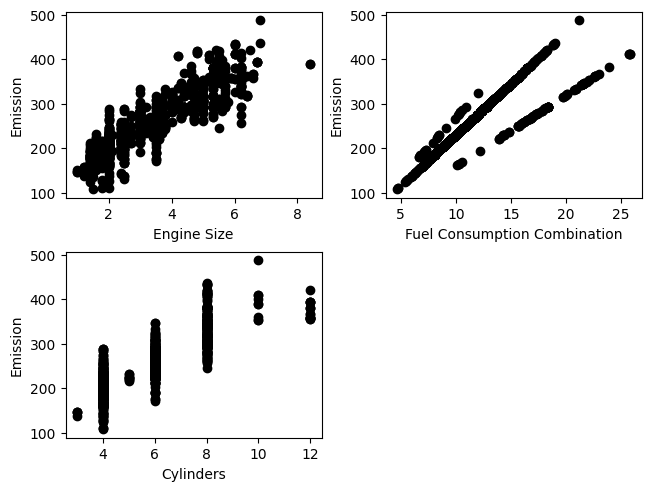

In [329]:
figure, axes = plt.subplots(2, 2, constrained_layout=True)
axes[1, 1].set_visible(False)

axes[0, 0].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="black")
axes[0, 0].set_xlabel("Engine Size")
axes[0, 0].set_ylabel("Emission")

axes[0, 1].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="black")
axes[0, 1].set_xlabel("Fuel Consumption Combination")
axes[0, 1].set_ylabel("Emission")

axes[1, 0].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="black")
axes[1, 0].set_xlabel("Cylinders")
axes[1, 0].set_ylabel("Emission")

## Masking

In [330]:
mask = np.random.random(len(df)) < 0.8
train_data = cdf[mask]
test_data = cdf[~mask]

## Processing Data
### In (y = b + a1*x + a2 + x**2) to (y = b + a1*x + a2 + x1). Actually x**2 = x1

In [331]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train_data[["ENGINESIZE"]])
train_y = np.asanyarray(train_data[["CO2EMISSIONS"]])

test_x = np.asanyarray(test_data[["ENGINESIZE"]])
test_y = np.asanyarray(test_data[["CO2EMISSIONS"]])

# print(PolynomialFeatures(degree=3).fit_transform(np.array([[2], [3]]))) #[[ 1.  2.  4.  8.], [ 1.  3.  9. 27.]]

polynomial = PolynomialFeatures(degree=2)
train_x_poly = polynomial.fit_transform(train_x) # [[x0**0, x0**1, x0**2], [x1**0, x1**1, x1**2], ...]
test_x_poly = polynomial.fit_transform(test_x)


## Polynomial Regression

In [332]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(train_x_poly, train_y)

print(f"Emission = {reg.intercept_[0]} + ({reg.coef_[0][1]} * Engin_Size) + ({reg.coef_[0][2]} * Engin_Size**2)")


Emission = 107.98968735160929 + (49.941157462386464 * Engin_Size) + (-1.417997308913284 * Engin_Size**2)


## Prediction (Test)

In [333]:
predicted_y = reg.predict(test_x_poly)
print(f"Residual Sum of Squares: {np.mean((predicted_y - test_y) ** 2)}")
print(f"R-Score (between 0 and 1, 1 is ideal): {reg.score(test_x_poly, test_y)}")

Residual Sum of Squares: 906.908101991761
R-Score (between 0 and 1, 1 is ideal): 0.749831252681532


## Plot

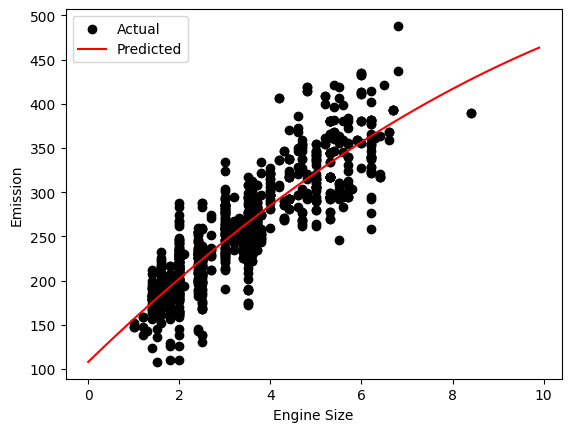

In [335]:
enginSizes = np.arange(0, 10, .1)
predictedEmission = reg.intercept_[0] + reg.coef_[0][1] * enginSizes + reg.coef_[0][2] * (enginSizes ** 2)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="black", label="Actual")
plt.plot(enginSizes, predictedEmission, color="red", label="Predicted")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.legend()
plt.show()